<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Netflix_Recommendation_Capstron_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# Allocating column names to data frame
df = pd.read_csv(r'movie_titles.csv',
                 header=None,
                 names=['movie_id', 'year', 'title'],
                 encoding='latin1',
                on_bad_lines='skip')

In [58]:
df.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [59]:
# Year Convertion from float to int
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

In [60]:
df.head()

,movie_id,year,title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [61]:
df_new = pd.read_csv(r'combined_data_1.txt')

In [62]:
# combined data contains movie_id, user_id, rating, date
df_new.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [63]:

file_path = r'combined_data_1.txt'

movie_id = 0
data = {'movie_id': [], 'user_id': [], 'rating': [], 'date': []}

with open(file_path, 'r', encoding='latin1') as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            movie_id = int(line[:-1])
        else:
            try:
                user_id, rating, date = line.split(',')
                data['movie_id'].append(movie_id)
                data['user_id'].append(int(user_id))
                data['rating'].append(int(rating))
                data['date'].append(date)
            except ValueError:
                continue

ratings = pd.DataFrame(data)



In [64]:
print(ratings.head())

   movie_id  user_id  rating        date
0         1  1488844       3  2005-09-06
1         1   822109       5  2005-05-13
2         1   885013       4  2005-10-19
3         1    30878       4  2005-12-26
4         1   823519       3  2004-05-03


In [65]:
# merging movie titles and combined data datasets

df = ratings.merge(df, on='movie_id', how='left')

In [66]:
df

,movie_id,user_id,rating,date,year,title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet
...,...,...,...,...,...,...
16457028,3181,2100574,5,2005-12-03,2000,Batman Beyond: Return of the Joker
16457029,3181,1645748,4,2005-12-10,2000,Batman Beyond: Return of the Joker
16457030,3181,1583129,1,2005-12-30,2000,Batman Beyond: Return of the Joker
16457031,3181,1897,3,2002-05-02,2000,Batman Beyond: Return of the Joker


In [67]:
# popular movies by count of ratings

top_movies = (
    df.groupby('title')['rating']
    .count()
    .sort_values(ascending=False)
    .head(15)
    .index.tolist()
)

print(top_movies)

['Pirates of the Caribbean: The Curse of the Black Pearl', 'What Women Want', 'American Beauty', 'Lord of the Rings: The Fellowship of the Ring', '50 First Dates', 'The Wedding Planner', 'The Bourne Supremacy', 'Braveheart', 'Ghost', 'Man on Fire', 'The Silence of the Lambs', 'S.W.A.T.', "Something's Gotta Give", 'Kill Bill: Vol. 2', 'Napoleon Dynamite']


In [68]:

# Manual genre mapping for known titles
genre_map = {
    'Dinosaur Planet': 'Documentary',
    'Isle of Man TT 2004 Review': 'Sports',
    'Character': 'Drama',
    "Paula Abdul's Get Up & Dance": 'Music',
    'The Rise and Fall of ECW': 'Sports'
}

# Keyword based fallback extraction function
genre_keywords = {
    'Love': 'Romance',
    'War': 'War',
    'Dance': 'Music',
    'Planet': 'Documentary',
    'Football': 'Sports',
    'Horror': 'Horror',
    'Adventure': 'Action',
    'Comedy': 'Comedy',
    'Life': 'Drama',
    'Crime': 'Thriller',
    'World': 'Documentary',
    'Space': 'Sci-Fi',
    'Battle': 'Action',
    'Police': 'Crime',
    'Ghost': 'Horror',
    'Heart': 'Romance',
}

def extract_genre(title):
    """Heuristic extraction of genre from movie title."""
    for word, genre in genre_keywords.items():
        if word.lower() in str(title).lower():
            return genre
    return 'Unknown'

# manual mapping
df['genre'] = df['title'].map(genre_map)

# keyword extraction for remaining movies
df['genre'] = np.where(df['genre'].isna(), df['title'].apply(extract_genre), df['genre'])

df[['title', 'genre']].head(85)


,title,genre
0,Dinosaur Planet,Documentary
1,Dinosaur Planet,Documentary
2,Dinosaur Planet,Documentary
3,Dinosaur Planet,Documentary
4,Dinosaur Planet,Documentary
...,...,...
80,Dinosaur Planet,Documentary
81,Dinosaur Planet,Documentary
82,Dinosaur Planet,Documentary
83,Dinosaur Planet,Documentary


In [69]:
df['genre'].unique()

array(['Documentary', 'Sports', 'Drama', 'Music', 'Unknown', 'Romance',
       'Horror', 'War', 'Sci-Fi', 'Action', 'Crime', 'Thriller', 'Comedy'],
      dtype=object)

In [70]:
df.head()

,movie_id,user_id,rating,date,year,title,genre
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet,Documentary
1,1,822109,5,2005-05-13,2003,Dinosaur Planet,Documentary
2,1,885013,4,2005-10-19,2003,Dinosaur Planet,Documentary
3,1,30878,4,2005-12-26,2003,Dinosaur Planet,Documentary
4,1,823519,3,2004-05-03,2003,Dinosaur Planet,Documentary


# 1. Find out the list of most popular and liked genre

In [83]:
# Calculate genre stats

genre_stats = (
    df.groupby('genre')['rating']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'num_ratings', 'mean': 'avg_rating'})
)

filtered_genre_stats = genre_stats[genre_stats['genre'] != 'Unknown']

most_popular_genre = filtered_genre_stats.sort_values('num_ratings', ascending=False).head(10)
most_liked_genre   = filtered_genre_stats.sort_values('avg_rating', ascending=False).head(10)



In [84]:
print(most_popular_genre)

          genre  num_ratings  avg_rating
7       Romance       297639    3.801884
5        Horror       292129    3.556997
4         Drama       188904    3.525611
12          War       152550    3.697214
3   Documentary        93403    3.448465
0        Action        46442    3.716162
8        Sci-Fi        15244    3.542574
6         Music        11130    3.484726
1        Comedy         7045    3.122356
2         Crime         4950    3.487071


In [76]:
print(most_liked_genre)

          genre  num_ratings  avg_rating
9        Sports         1285    3.878599
7       Romance       297639    3.801884
0        Action        46442    3.716162
12          War       152550    3.697214
5        Horror       292129    3.556997
8        Sci-Fi        15244    3.542574
4         Drama       188904    3.525611
2         Crime         4950    3.487071
6         Music        11130    3.484726
3   Documentary        93403    3.448465


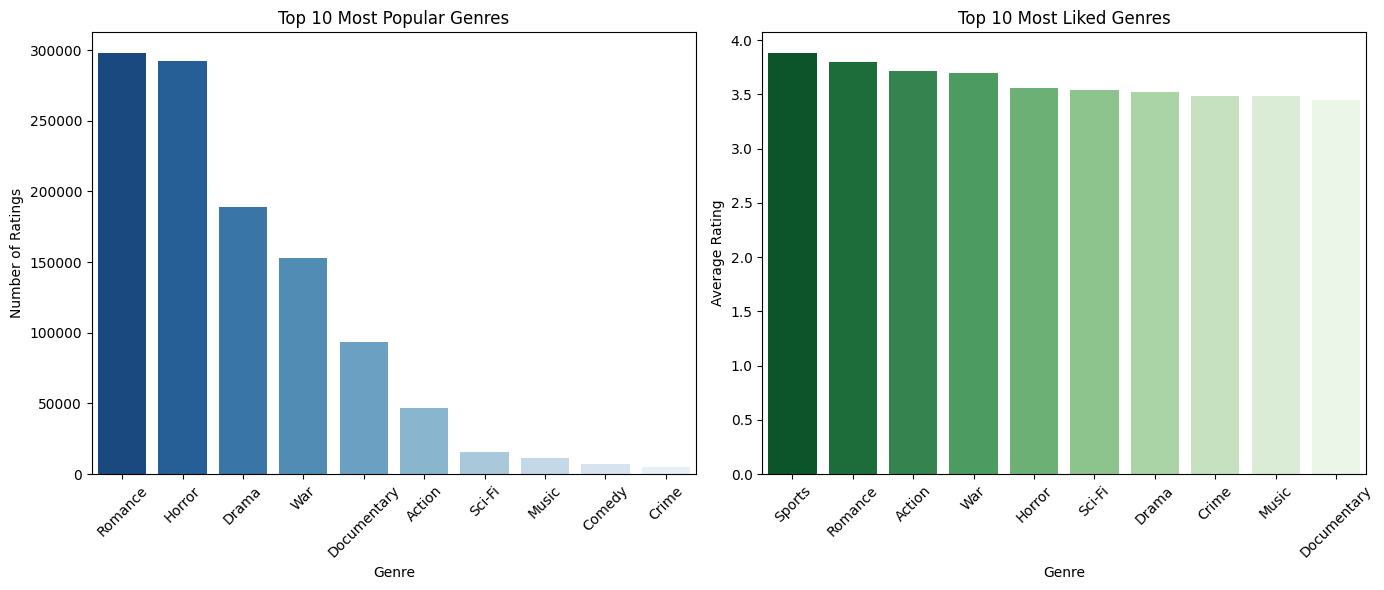

In [78]:

plt.figure(figsize=(14,6))

# Popular genres
plt.subplot(1,2,1)
sns.barplot(data=most_popular_genre, x='genre', y='num_ratings', hue='genre', dodge=False, legend=False, palette='Blues_r')
plt.title('Top 10 Most Popular Genres')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')

# Liked genres
plt.subplot(1,2,2)
sns.barplot(data=most_liked_genre, x='genre', y='avg_rating', hue='genre', dodge=False, legend=False, palette='Greens_r')
plt.title('Top 10 Most Liked Genres')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

# 2. Create Model that finds the best suited Movie for one user in every genre

In [98]:

def best_movies_per_genre_for_user(df, user_id, top_n=1):

    df = df.dropna(subset=['rating'])

    # Movies already rated by the user
    watched = df[df['user_id'] == user_id]['title'].unique()

    # Average rating per movie within each genre
    genre_movie_ratings = (
        df.groupby(['genre', 'title'])['rating']
        .mean()
        .reset_index()
        .rename(columns={'rating': 'avg_rating'})
    )

    # Remove already watched movies
    genre_movie_ratings = genre_movie_ratings[~genre_movie_ratings['title'].isin(watched)]

    # Get top N movies per genre
    best_per_genre = (
        genre_movie_ratings
        .sort_values(['genre', 'avg_rating'], ascending=[True, False])
        .groupby('genre')
        .head(top_n)
        .sort_values('avg_rating', ascending=False)
        .reset_index(drop=True)
    )

    return best_per_genre

# Example usage
user_id_example = df['user_id'].iloc[0]
best_for_user = best_movies_per_genre_for_user(df, user_id_example, top_n=1)

print(f"Best suited movies for User {user_id_example} in every genre:")
print(best_for_user)



Best suited movies for User 1488844 in every genre:
          genre                                              title  avg_rating
0        Horror   Ghost in the Shell: Stand Alone Complex: 2nd Gig    4.586364
1       Unknown                             The Simpsons: Season 6    4.581296
2           War                                 Foyle's War: Set 2    4.249293
3       Romance                              I Love Lucy: Season 5    4.192128
4        Sci-Fi  VeggieTales Classics: Larry-Boy & The Fib from...    4.189387
5         Drama                                  The Life of Birds    4.164071
6        Action                              The Battle of Algiers    4.123802
7   Documentary                    Dragon Ball Z: World Tournament    3.981117
8        Sports                           The Rise and Fall of ECW    3.919298
9         Music                                    Shall We Dance?    3.818017
10     Thriller  Burn Up Excess: Vol. 2: Crimes and Missed Deme...    3.654596


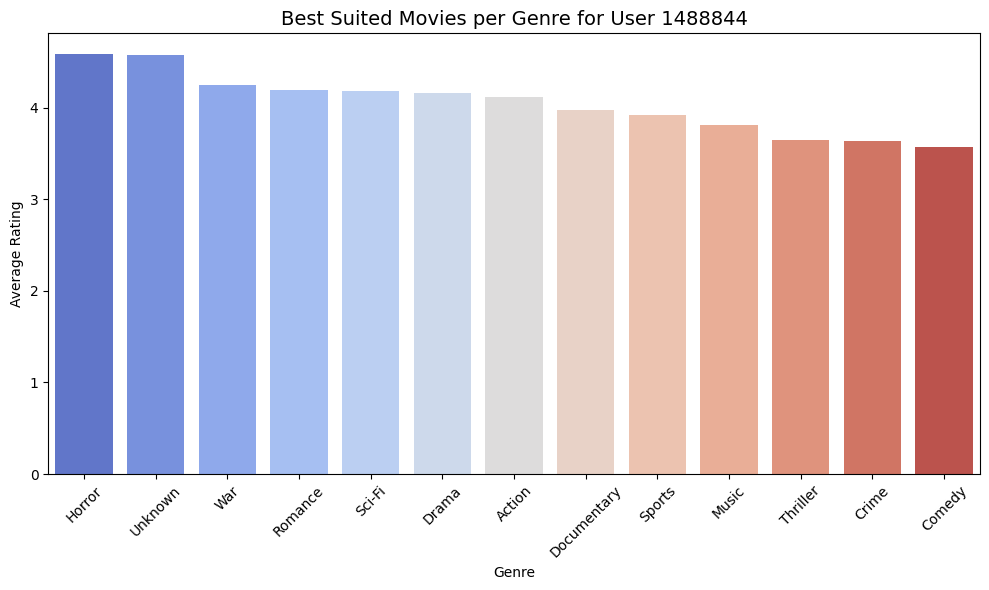

In [97]:

plt.figure(figsize=(10,6))
sns.barplot(data=best_for_user, x='genre', y='avg_rating', hue='genre', dodge=False, legend=False, palette='coolwarm',)
plt.title(f"Best Suited Movies per Genre for User {user_id_example}", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()



 # 3. Find what Genre Movies have received the best and worst ratings based on User Rating

In [99]:

#  Statistics per genre
genre_summary = (
    df.groupby('genre')['rating']
      .agg(['mean', 'count'])
      .reset_index()
      .rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'})
)


best_genres = genre_summary.sort_values('avg_rating', ascending=False).head(5)
worst_genres = genre_summary.sort_values('avg_rating', ascending=True).head(5)

print("Best Genres with Highest Average Ratings:")
print(best_genres)

print("Worst Genres with Lowest Average Ratings:")
print(worst_genres)


Best Genres with Highest Average Ratings:
      genre  avg_rating  num_ratings
9    Sports    3.878599         1285
7   Romance    3.801884       297639
0    Action    3.716162        46442
12      War    3.697214       152550
11  Unknown    3.613420     15344047
Worst Genres with Lowest Average Ratings:
          genre  avg_rating  num_ratings
10     Thriller    3.058720         2265
1        Comedy    3.122356         7045
3   Documentary    3.448465        93403
6         Music    3.484726        11130
2         Crime    3.487071         4950


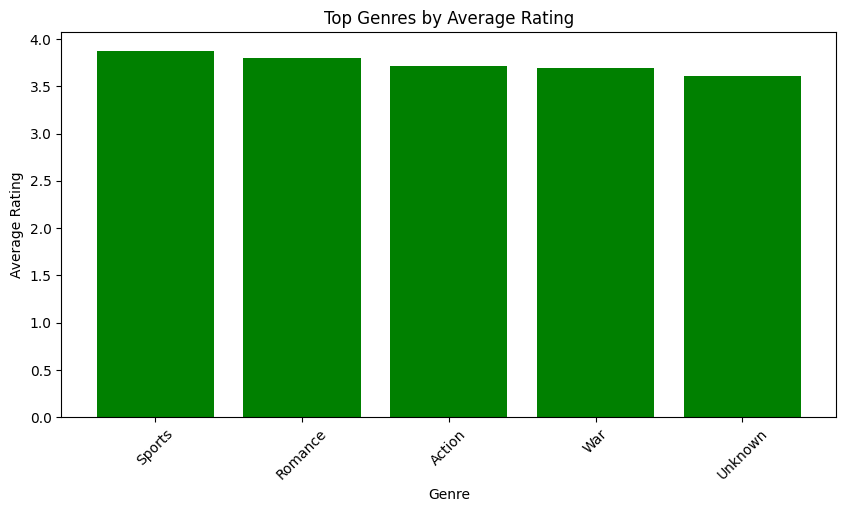

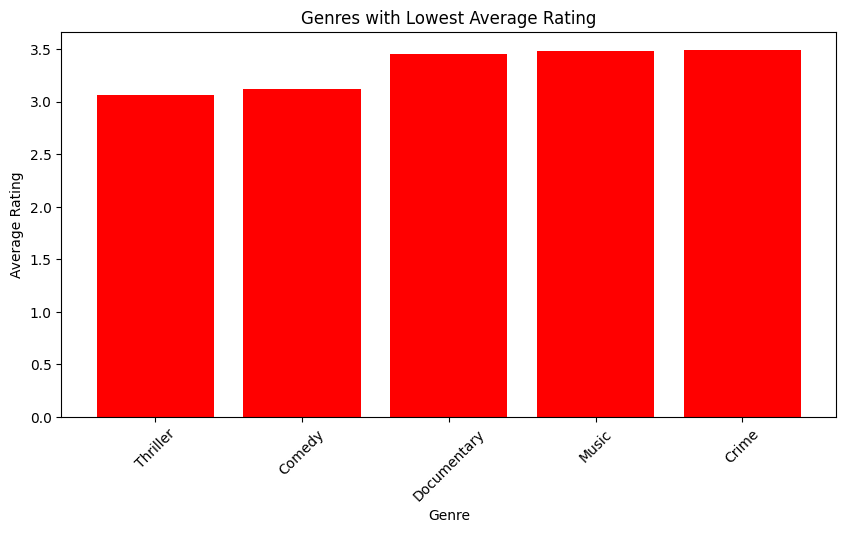

In [100]:

plt.figure(figsize=(10,5))
plt.bar(best_genres['genre'], best_genres['avg_rating'], color='green')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(worst_genres['genre'], worst_genres['avg_rating'], color='red')
plt.title('Genres with Lowest Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()
